Este notebook es para analizar los recorridos y así poder añadir información no extraible de manera automática.

In [64]:
%matplotlib notebook

import os

import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pynsia.pointcloud import PointCloud

import ipywidgets as widgets
from IPython.display import display

In [81]:
BASE_PATH = '/home/blazaid/Projects/data-phd/sync'
SUBJECT = 'jj'  # edgar, jj, miguel
DATASET = 'training'  # training, validation

In [82]:
PATH = os.path.join(BASE_PATH, SUBJECT, DATASET)
df = pd.read_csv(os.path.join(PATH, 'dataset.csv'))

In [83]:
df[2:5]

,Unnamed: 0,Unnamed: 0.1,canbus_Speed (km/h),gps_positions_latitude,gps_positions_longitude,gps_positions_altitude,gps_speeds_speed,snapshots_path,pointclouds_path
2,2,2,45.0,40.386192,-3.626683,689.4,12.007133,snapshots/img_6.png,pointclouds/pcl_7.csv
3,3,3,45.0,40.386182,-3.626678,689.4,11.965978,snapshots/img_9.png,pointclouds/pcl_8.csv
4,4,4,45.0,40.386171,-3.626674,689.4,11.924822,snapshots/img_12.png,pointclouds/pcl_9.csv


<IPython.core.display.Javascript object>


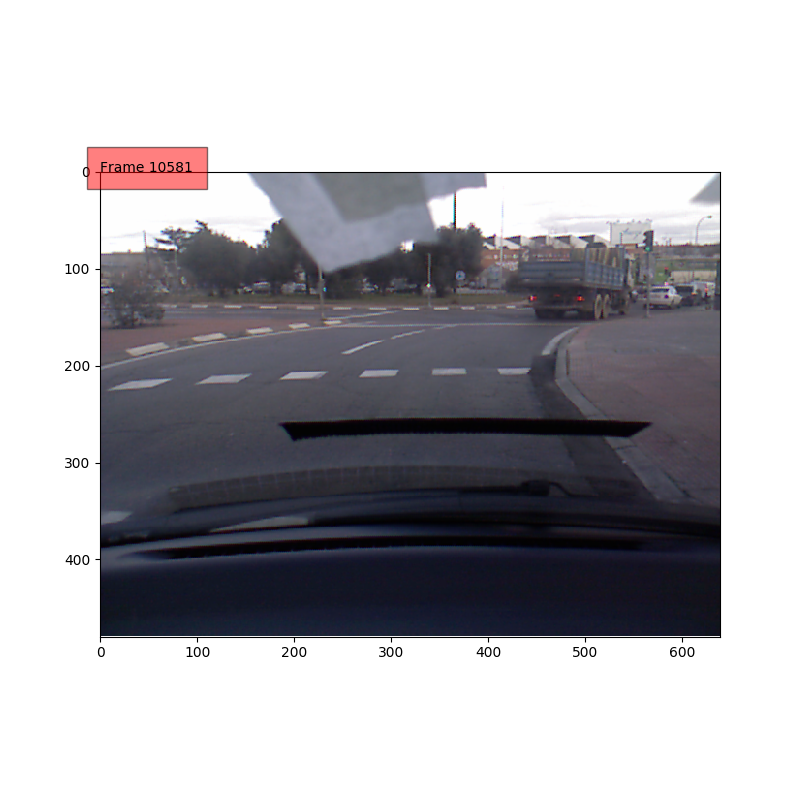

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

from_index = 10290

def plt_image(ax, index, path):
    image = mpimg.imread(path)
    ax.clear()
    ax.imshow(image)
    ax.text(0, 0, 'Frame ' + str(index), bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

for index, row in df.iterrows():
    if from_index is not None and from_index <= index:
        if not pd.isnull(row['snapshots_path']):
            plt_image(ax, index, os.path.join(PATH, row['snapshots_path']))
            #time.sleep(1)

            fig.canvas.draw()

In [ ]:
sequences = {
    'edgar': {
        'training': [
            (100, 250),(400, 500),(510, 570),(800, 960),(1100, 1225),
            (1960, 2010),(2060, 2110),(2180, 2270),(2360, 2600),(2765, 2950),
            (3280, 3670),(4070, 4130),(4160, 4310),(4420, 4570),(4700, 4800),
            (4860, 4940),(5000, 5080),(5695, 5800),(5880, 5960),(6180, 6200),
            (6650, 6740),(6830, 6880),(6995, 7060),(7140, 7300),(7330, 7500),
            (7520, 7560),(7620, 7690),(7760, 7900),(7920, 7980),(8120, 8220),
            (8310, 8410),(8800, 8900),(9020, 9460),(9500, 9580),
        ],
        'validation': [
            (0, 80),(110, 300),(350, 540),(720, 820),(850, 900),(1440, 1670),
            (1900, 1980),(2500, 2730),(3030, 3160),(3270, 3380),(3550, 3690),
            (3890, 3910),(3960, 4000),(4080, 4440),
        ],
    },
    'jj': {
        'training': [
            (0, 100),(150 255),(950, 1110),(1111, 1300),(1520, 1660),
            (1700, 1860),(1900, 2020),(2160, 2250),(2430, 2550),(2551, 2695),
            (2900, 3080),(3160, 3250),(3260, 3340),(3660, 3705),(3860, 4200),
            (4710, 4780),(4836, 5200),(5310, 5610),(5890, 6050),(6420, 6540),
            (6780, 6820),(6821, 7000),(7180, 7280),(7350, 7777),(8620, 8900),
            (9265, 9350),(9520, 9930),(9980, 10150),(10230, 10400),
        ],
        'validation': [],
    },
    'miguel': {
        'training': [],
        'validation': [],
    },
}